In [1]:
import nltk
import os
import re
import pandas as pd
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [2]:
# Read the dataset
data=pd.read_csv("hindi-train.csv")
data.head()

,headline,Label
0,"मेलबर्न एयरपोर्ट पर घंटों फंसे नोवाक जोकोविच, ...",Sports
1,अर्जेंटीना के स्टार फुटबॉलर लियोनल मेसी कोविड-...,Sports
2,"SAI का बड़ा फैसला, कैंपों और प्रैक्टिस सेंटर म...",Sports
3,Pro Kabaddi League: ऑलराउंडर रोहित गूलिया के द...,Sports
4,टेनिस: टाटा ओपन महाराष्ट्र में भारत के युकी भा...,Sports


In [3]:
# Remove Punc
data["No_punc"] = data["headline"].str.replace('[^\w\s]','')
data.head()

C:\Users\Cyril\AppData\Local\Temp\ipykernel_16388\2221542479.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["No_punc"] = data["headline"].str.replace('[^\w\s]','')


,headline,Label,No_punc
0,"मेलबर्न एयरपोर्ट पर घंटों फंसे नोवाक जोकोविच, ...",Sports,मलबरन एयरपरट पर घट फस नवक जकवच फर कसल कर दय गय...
1,अर्जेंटीना के स्टार फुटबॉलर लियोनल मेसी कोविड-...,Sports,अरजटन क सटर फटबलर लयनल मस कवड19 टसट म नगटव आन ...
2,"SAI का बड़ा फैसला, कैंपों और प्रैक्टिस सेंटर म...",Sports,SAI क बड फसल कप और परकटस सटर म पहचन पर खलडय क ...
3,Pro Kabaddi League: ऑलराउंडर रोहित गूलिया के द...,Sports,Pro Kabaddi League ऑलरउडर रहत गलय क दम पर हरयण...
4,टेनिस: टाटा ओपन महाराष्ट्र में भारत के युकी भा...,Sports,टनस टट ओपन महरषटर म भरत क यक भबर क डयरकट एटर


In [4]:
# Remove Nos

nos = re.compile(r'[0-9]')
data['No_punc'] = data['No_punc'].str.replace(nos, '')
data.head()

,headline,Label,No_punc
0,"मेलबर्न एयरपोर्ट पर घंटों फंसे नोवाक जोकोविच, ...",Sports,मलबरन एयरपरट पर घट फस नवक जकवच फर कसल कर दय गय...
1,अर्जेंटीना के स्टार फुटबॉलर लियोनल मेसी कोविड-...,Sports,अरजटन क सटर फटबलर लयनल मस कवड टसट म नगटव आन क ...
2,"SAI का बड़ा फैसला, कैंपों और प्रैक्टिस सेंटर म...",Sports,SAI क बड फसल कप और परकटस सटर म पहचन पर खलडय क ...
3,Pro Kabaddi League: ऑलराउंडर रोहित गूलिया के द...,Sports,Pro Kabaddi League ऑलरउडर रहत गलय क दम पर हरयण...
4,टेनिस: टाटा ओपन महाराष्ट्र में भारत के युकी भा...,Sports,टनस टट ओपन महरषटर म भरत क यक भबर क डयरकट एटर


In [6]:
# Remove Aphabets
alpha = re.compile(r'[a-zA-Z]')
data['No_punc'] = data['No_punc'].str.replace(alpha, '')
data.head()

,headline,Label,No_punc
0,"मेलबर्न एयरपोर्ट पर घंटों फंसे नोवाक जोकोविच, ...",Sports,मलबरन एयरपरट पर घट फस नवक जकवच फर कसल कर दय गय...
1,अर्जेंटीना के स्टार फुटबॉलर लियोनल मेसी कोविड-...,Sports,अरजटन क सटर फटबलर लयनल मस कवड टसट म नगटव आन क ...
2,"SAI का बड़ा फैसला, कैंपों और प्रैक्टिस सेंटर म...",Sports,क बड फसल कप और परकटस सटर म पहचन पर खलडय क करन...
3,Pro Kabaddi League: ऑलराउंडर रोहित गूलिया के द...,Sports,ऑलरउडर रहत गलय क दम पर हरयण सटलरस न य मब क ...
4,टेनिस: टाटा ओपन महाराष्ट्र में भारत के युकी भा...,Sports,टनस टट ओपन महरषटर म भरत क यक भबर क डयरकट एटर


In [7]:
# Tokenization

import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

f=data['No_punc']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(f)


# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 13176


In [8]:
t = tokenizer.texts_to_sequences(f)
print(t[:5])

[[3579, 1206, 6, 286, 254, 556, 489, 14, 3150, 11, 34, 45, 455, 1351, 71, 9, 5, 6, 202], [1276, 1, 380, 635, 740, 408, 205, 625, 2, 2102, 406, 1, 29, 1620, 1, 21, 1115], [1, 63, 230, 170, 8, 1579, 380, 2, 741, 6, 394, 1, 20, 26, 3580, 7874, 625], [4224, 272, 2486, 1, 275, 6, 682, 2400, 4, 30, 2401, 1, 13, 3, 3581, 114], [362, 351, 180, 320, 2, 52, 1, 5259, 7875, 1, 2985, 455]]


33
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  3579 1206    6  286  254  556  489   14 3150   11   34   45  455 1351
    71    9    5    6  202]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0 1276    1  380  635  740  408  205  625    2 2102  406    1
    29 1620    1   21 1115]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1   63  230  170    8 1579  380    2  741    6  394    1
    20   26 3580 7874  625]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 4224  272 2486    1  275    6  682 2400    4   30 2401
     1   13    3 3581  114]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0  362  351  180  320    2   52    1
  5259 7875    1 2985  455]]


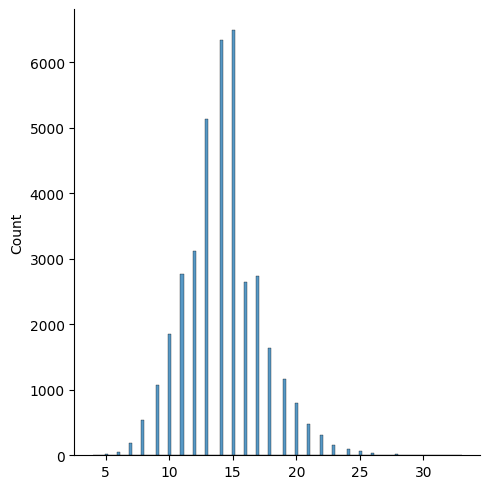

In [9]:
# Padding

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

t_lens = [len(n) for n in t]
t_lens

sns.displot(t_lens)
max_len = t_lens[np.argmax(t_lens)]
print(max_len) #33

t_pad = sequence.pad_sequences(t, maxlen=max_len)
print(t_pad[:5])

In [10]:
#  creating a new dataframe with the Padded sequence
df = pd.DataFrame(t_pad)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,11,34,45,455,1351,71,9,5,6,202
1,0,0,0,0,0,0,0,0,0,0,...,625,2,2102,406,1,29,1620,1,21,1115
2,0,0,0,0,0,0,0,0,0,0,...,2,741,6,394,1,20,26,3580,7874,625
3,0,0,0,0,0,0,0,0,0,0,...,682,2400,4,30,2401,1,13,3,3581,114
4,0,0,0,0,0,0,0,0,0,0,...,180,320,2,52,1,5259,7875,1,2985,455


In [11]:
# Label Encoding the target values
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data['target'] = labelEncoder.fit_transform(data['Label']) # target variable is label encoded 
data.head()

,headline,Label,No_punc,target
0,"मेलबर्न एयरपोर्ट पर घंटों फंसे नोवाक जोकोविच, ...",Sports,मलबरन एयरपरट पर घट फस नवक जकवच फर कसल कर दय गय...,3
1,अर्जेंटीना के स्टार फुटबॉलर लियोनल मेसी कोविड-...,Sports,अरजटन क सटर फटबलर लयनल मस कवड टसट म नगटव आन क ...,3
2,"SAI का बड़ा फैसला, कैंपों और प्रैक्टिस सेंटर म...",Sports,क बड फसल कप और परकटस सटर म पहचन पर खलडय क करन...,3
3,Pro Kabaddi League: ऑलराउंडर रोहित गूलिया के द...,Sports,ऑलरउडर रहत गलय क दम पर हरयण सटलरस न य मब क ...,3
4,टेनिस: टाटा ओपन महाराष्ट्र में भारत के युकी भा...,Sports,टनस टट ओपन महरषटर म भरत क यक भबर क डयरकट एटर,3


In [12]:
# Test train split

from sklearn.model_selection import train_test_split
X = df
y = data['target']

X.shape
y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)



In [13]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [29]:
# MLP Model building
import tensorflow as tf

NUM_CLASSES = 5
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compiling the model with the high-level keras
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# Model training
model.fit(trainX_scaled, y_train, epochs=50, batch_size=32)

Epoch 1/50
826/826 [==============================] - 2s 2ms/step - loss: 1.5254 - sparse_categorical_accuracy: 0.3097
Epoch 2/50
826/826 [==============================] - 2s 2ms/step - loss: 1.4671 - sparse_categorical_accuracy: 0.3477
Epoch 3/50
826/826 [==============================] - 2s 2ms/step - loss: 1.4474 - sparse_categorical_accuracy: 0.3542
Epoch 4/50
826/826 [==============================] - 2s 2ms/step - loss: 1.4337 - sparse_categorical_accuracy: 0.3576
Epoch 5/50
826/826 [==============================] - 2s 2ms/step - loss: 1.4223 - sparse_categorical_accuracy: 0.3597
Epoch 6/50
826/826 [==============================] - 2s 2ms/step - loss: 1.4129 - sparse_categorical_accuracy: 0.3650
Epoch 7/50
826/826 [==============================] - 2s 2ms/step - loss: 1.4041 - sparse_categorical_accuracy: 0.3701
Epoch 8/50
826/826 [==============================] - 2s 2ms/step - loss: 1.3959 - sparse_categorical_accuracy: 0.3750
Epoch 9/50
826/826 [============================

In [30]:
# Evaluation of model
eval_loss, eval_acc = model.evaluate(testX_scaled,  y_test, verbose=1)
print('Eval accuracy percentage: {:.2f}'.format(eval_acc * 100))

#Note without scaling the accuracy is 20%

354/354 [==============================] - 1s 2ms/step - loss: 1.3185 - sparse_categorical_accuracy: 0.4442
Eval accuracy percentage: 44.42
